In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE, f_classif, mutual_info_classif, f_regression, mutual_info_regression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, Isomap
import umap
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.model_selection import train_test_split
from funcs_6_lab import *
from algorithms import MyKMeans, MyPCA
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
N_SAMPLES = 60000

In [4]:
class_df = pd.read_csv('../data/csgo_processed.csv', sep=';')
class_y = class_df['bomb_planted'].values[:N_SAMPLES]
class_df = class_df.drop(['bomb_planted'], axis=1)[:N_SAMPLES]
class_X = class_df.values

In [5]:
reg_df = pd.read_csv('../data/diamonds_processed.csv', sep=';')
reg_y = reg_df['price'].values[:N_SAMPLES]
reg_df = reg_df.drop(['price'], axis=1)[:N_SAMPLES]
reg_X = reg_df.values

In [6]:
nb = GaussianNB()
bg = BaggingRegressor(max_features=1.0, max_samples=0.75, n_estimators=100)
nb.fit(class_X, class_y)
bg.fit(reg_X, reg_y)

BaggingRegressor(max_samples=0.75, n_estimators=100)

In [7]:
param_grid_variance = {
    'feature_selection__threshold': [0.0, 0.1, 0.3, 0.5, 0.9, 1.0]
}

param_grid_select_k_best_cls = {
    'feature_selection__k': np.arange(1, min(11, class_X.shape[1] + 1)),
    'feature_selection__score_func': [f_classif, mutual_info_classif]
}

param_grid_select_k_best_reg = {
    'feature_selection__k': np.arange(1, min(11, reg_X.shape[1] + 1)),
    'feature_selection__score_func': [f_regression, mutual_info_regression]
}

param_grid_rfe_cls = {
    'feature_selection__n_features_to_select': np.arange(1, min(11, class_X.shape[1] + 1)),
    'feature_selection__step': [1, 2]
}

param_grid_rfe_reg = {
    'feature_selection__n_features_to_select': np.arange(1, min(11, reg_X.shape[1] + 1)),
    'feature_selection__step': [1, 2]
}

param_grid_pca_cls = {
    'feature_selection__n_components': np.arange(1, min(11, class_X.shape[1] + 1)),
    'feature_selection__svd_solver': ['auto', 'full']
}

param_grid_pca_reg = {
    'feature_selection__n_components': np.arange(1, min(11, reg_X.shape[1] + 1)),
    'feature_selection__svd_solver': ['auto', 'full']
}

param_grid_kernel_pca_cls = {
    'feature_selection__n_components': np.arange(1, min(11, class_X.shape[1] + 1)),
    'feature_selection__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'feature_selection__gamma': [0.01, 0.1, 1.0]
}

param_grid_kernel_pca_reg = {
    'feature_selection__n_components': np.arange(1, min(11, reg_X.shape[1] + 1)),
    'feature_selection__kernel': ['linear', 'poly'],
    'feature_selection__gamma': [0.01, 0.1, 1.0]
}

param_grid_tsne_cls = {
    'feature_selection__n_components': [2, 3],
    'feature_selection__perplexity': [5, 10, 30, 50],
    'feature_selection__learning_rate': [10, 100, 200]
}

param_grid_tsne_reg = {
    'feature_selection__n_components': [2, 3],
    'feature_selection__perplexity': [5, 10, 30, 50],
    'feature_selection__learning_rate': [10, 100, 200]
}

param_grid_isomap_cls = {
    'feature_selection__n_components': np.arange(2, min(11, class_X.shape[1] + 1)),
    'feature_selection__n_neighbors': [3, 5, 7, 10],
    'feature_selection__metric': ['euclidean', 'manhattan']
}

param_grid_isomap_reg = {
    'feature_selection__n_components': np.arange(2, min(11, reg_X.shape[1] + 1)),
    'feature_selection__n_neighbors': [3, 5, 7, 10],
    'feature_selection__metric': ['euclidean', 'manhattan']
}

param_grid_umap_cls = {
    'feature_selection__n_components': [2, 3, 5],
    'feature_selection__n_neighbors': [5, 15, 30],
    'feature_selection__min_dist': [0.0, 0.1, 0.5]
}

param_grid_umap_reg = {
    'feature_selection__n_components': [2, 3, 5],
    'feature_selection__n_neighbors': [5, 15, 30],
    'feature_selection__min_dist': [0.0, 0.1, 0.5]
}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Лучшие параметры для VarianceThreshold: {'feature_selection__threshold': 0.0}
Лучший score: 0.8993


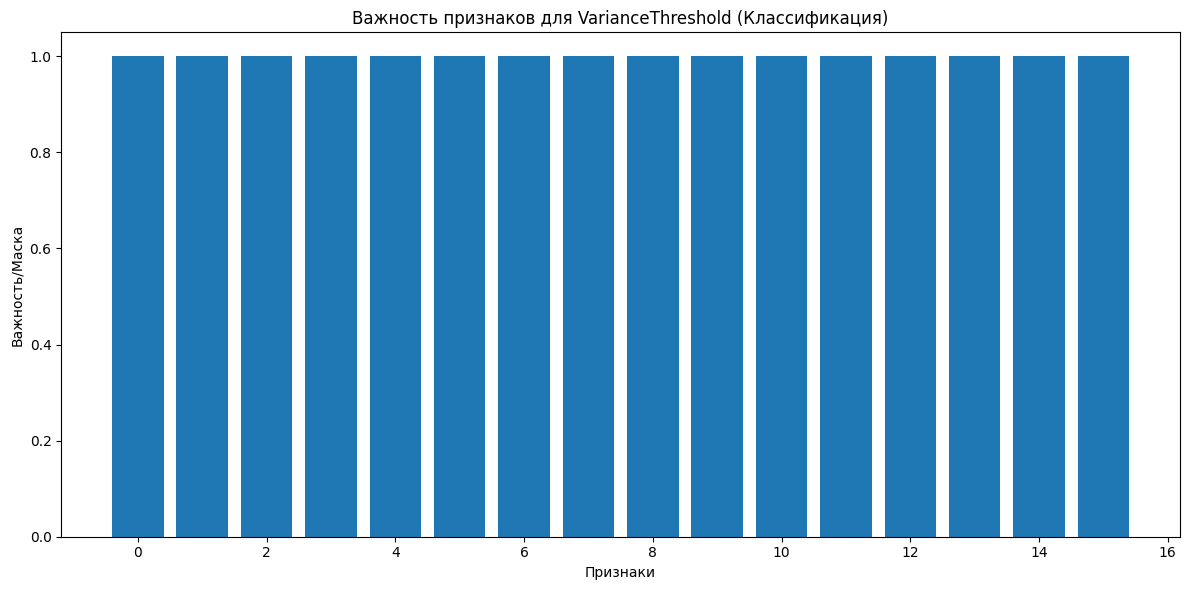

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Лучшие параметры для VarianceThreshold: {'feature_selection__threshold': 0.1}
Лучший MSE: -310021.3955


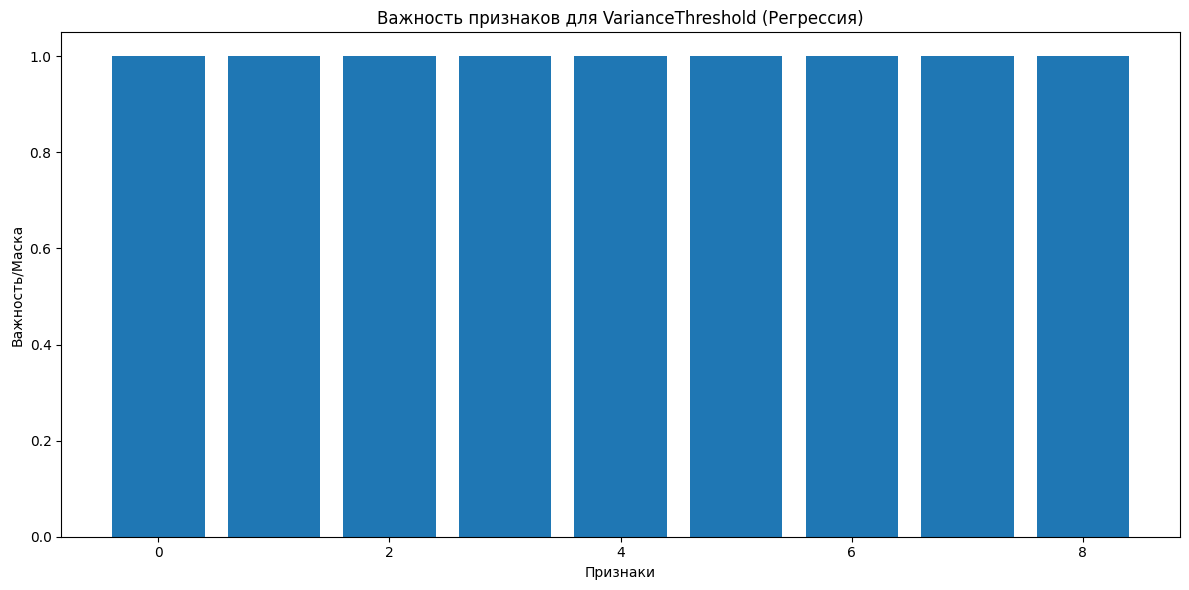

In [8]:
variance_selector_cls = VarianceThreshold()
best_model_variance_cls, best_params_variance_cls, feature_imp_variance_cls, variance_score_cls = optimize_for_classification(variance_selector_cls, param_grid_variance, 'VarianceThreshold', class_X, class_y)
visualize_results(feature_imp_variance_cls, 'VarianceThreshold', is_classification=True)
variance_selector_reg = VarianceThreshold()
best_model_variance_reg, best_params_variance_reg, feature_imp_variance_reg, variance_score_reg = optimize_for_regression(variance_selector_reg, param_grid_variance, 'VarianceThreshold', reg_X, reg_y)
visualize_results(feature_imp_variance_reg, 'VarianceThreshold', is_classification=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры для SelectKBest: {'feature_selection__k': 2, 'feature_selection__score_func': <function mutual_info_classif at 0x0000028EDD114CC0>}
Лучший score: 0.9278


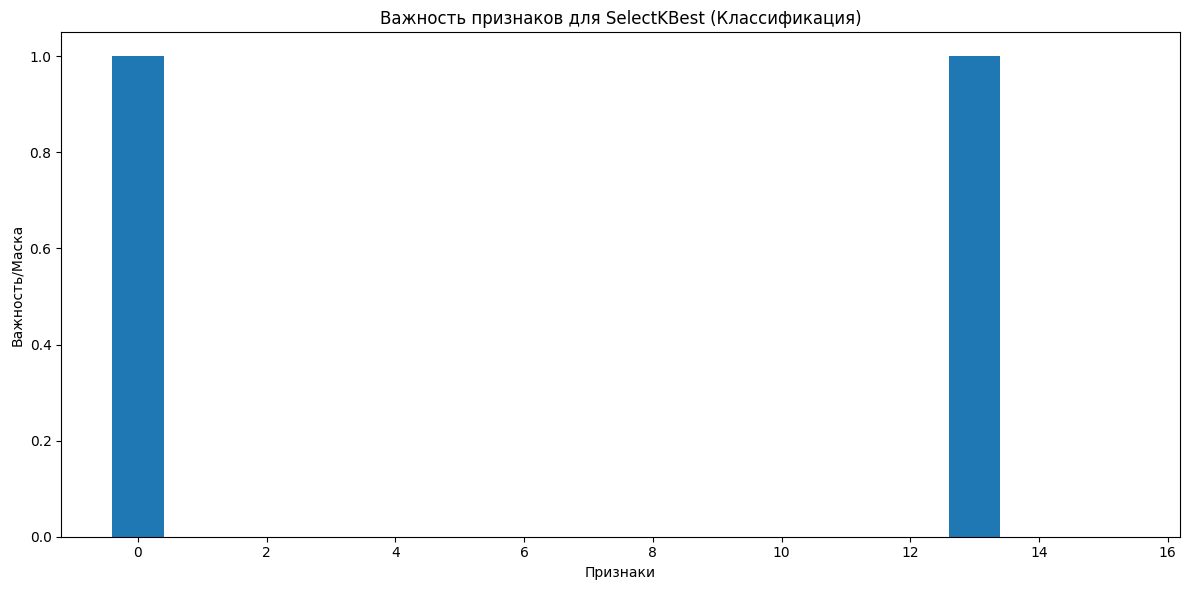

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Лучшие параметры для SelectKBest: {'feature_selection__k': 9, 'feature_selection__score_func': <function mutual_info_regression at 0x0000028EDD114B80>}
Лучший MSE: -309837.1693


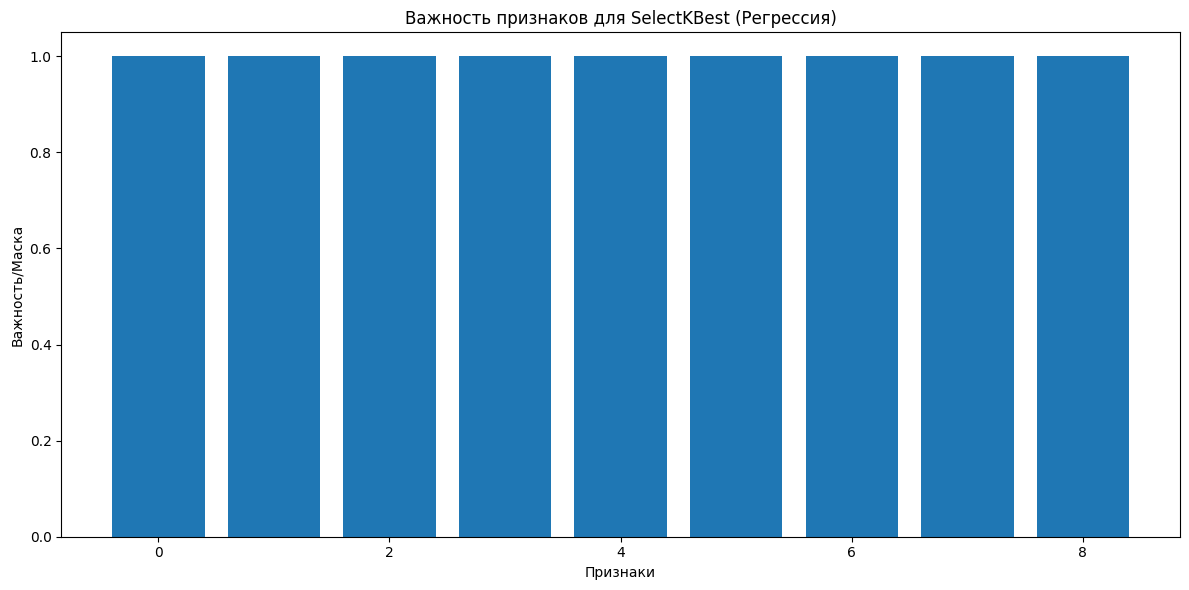

In [9]:
select_k_best_cls = SelectKBest(score_func=f_classif)
best_model_select_k_best_cls, best_params_select_k_best_cls, feature_imp_select_k_best_cls, select_k_best_score_cls = optimize_for_classification(select_k_best_cls, param_grid_select_k_best_cls, 'SelectKBest', class_X, class_y)
visualize_results(feature_imp_select_k_best_cls, 'SelectKBest', is_classification=True)
select_k_best_reg = SelectKBest(score_func=f_regression)
best_model_select_k_best_reg, best_params_select_k_best_reg, feature_imp_select_k_best_reg, select_k_best_score_reg = optimize_for_regression(select_k_best_reg, param_grid_select_k_best_reg, 'SelectKBest', reg_X, reg_y)
visualize_results(feature_imp_select_k_best_reg, 'SelectKBest', is_classification=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры для RFE: {'feature_selection__n_features_to_select': 2, 'feature_selection__step': 1}
Лучший score: 0.9252


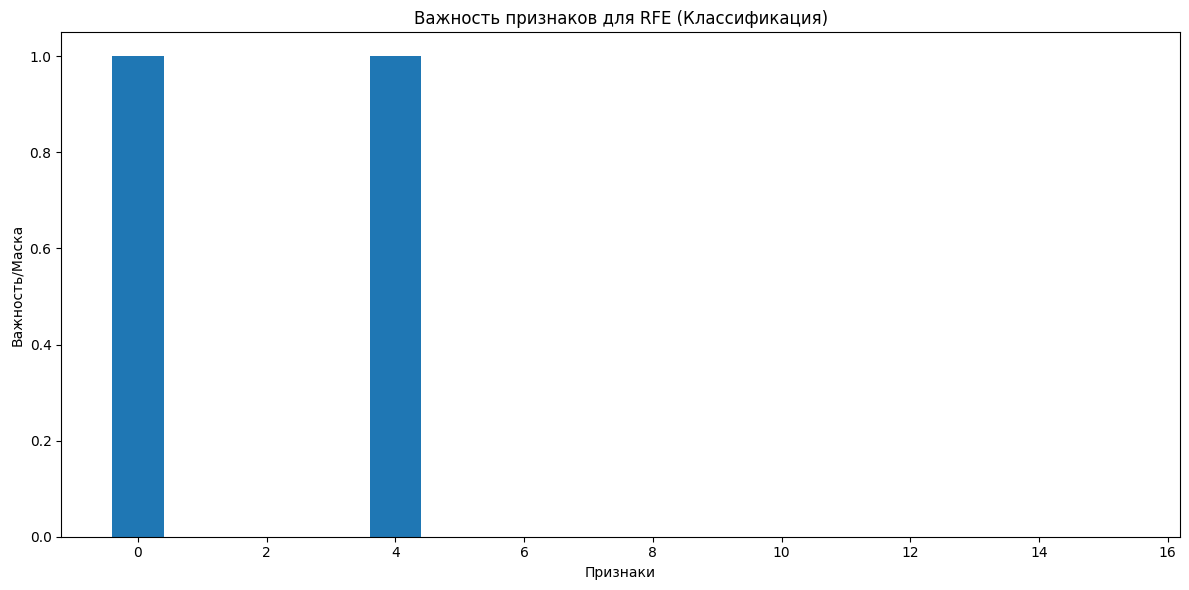

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Лучшие параметры для RFE: {'feature_selection__n_features_to_select': 9, 'feature_selection__step': 1}
Лучший MSE: -310667.5939


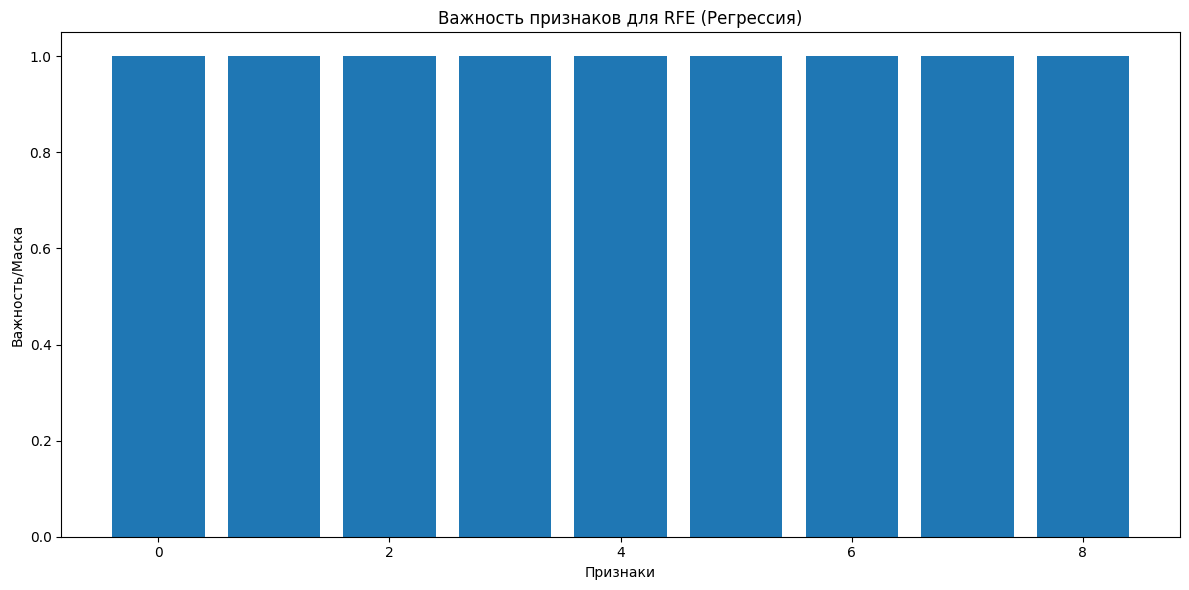

In [10]:
rfe_cls = RFE(estimator=RandomForestClassifier())
best_model_rfe_cls, best_params_rfe_cls, feature_imp_rfe_cls, rfe_score_cls = optimize_for_classification(rfe_cls, param_grid_rfe_cls, 'RFE', class_X, class_y)
visualize_results(feature_imp_rfe_cls, 'RFE', is_classification=True)
rfe_reg = RFE(estimator=BaggingRegressor(max_features=1.0, max_samples=0.75, n_estimators=100))
best_model_rfe_reg, best_params_rfe_reg, feature_imp_rfe_reg, rfe_score_reg = optimize_for_regression(rfe_reg, param_grid_rfe_reg, 'RFE', reg_X, reg_y)
visualize_results(feature_imp_rfe_reg, 'RFE', is_classification=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры для PCA: {'feature_selection__n_components': 9, 'feature_selection__svd_solver': 'auto'}
Лучший score: 0.9054


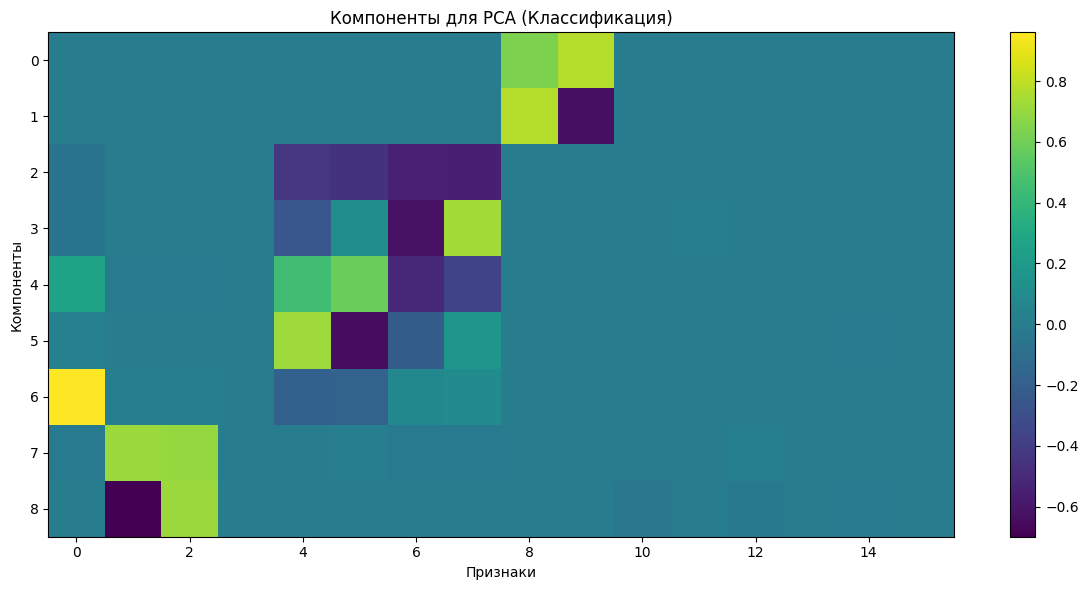

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Лучшие параметры для PCA: {'feature_selection__n_components': 7, 'feature_selection__svd_solver': 'full'}
Лучший MSE: -698704.1943


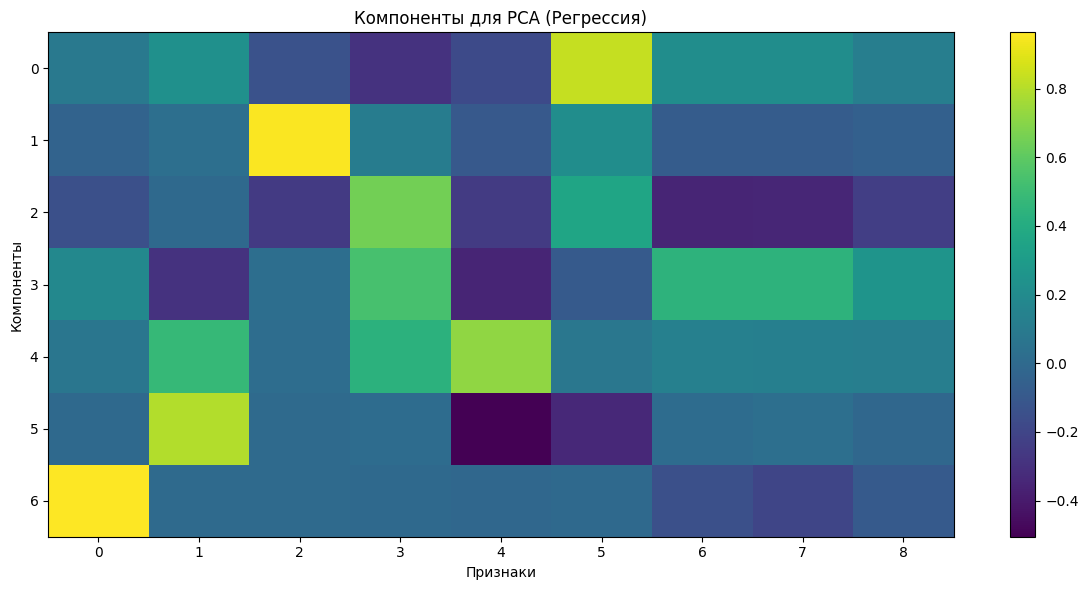

In [11]:
pca_cls = PCA()
best_model_pca_cls, best_params_pca_cls, feature_imp_pca_cls, pca_score_cls = optimize_for_classification(pca_cls, param_grid_pca_cls, 'PCA', class_X, class_y)
visualize_results(feature_imp_pca_cls, 'PCA', is_classification=True)
pca_reg = PCA()
best_model_pca_reg, best_params_pca_reg, feature_imp_pca_reg, pca_score_reg = optimize_for_regression(pca_reg, param_grid_pca_reg, 'PCA', reg_X, reg_y)
visualize_results(feature_imp_pca_reg, 'PCA', is_classification=False)

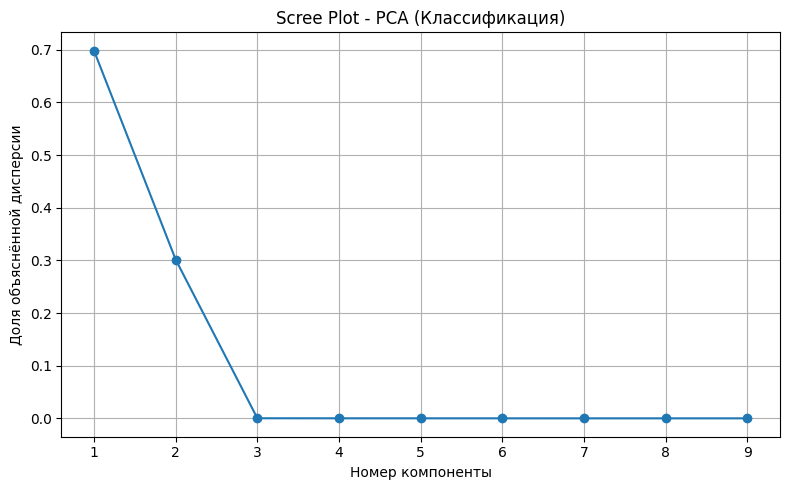

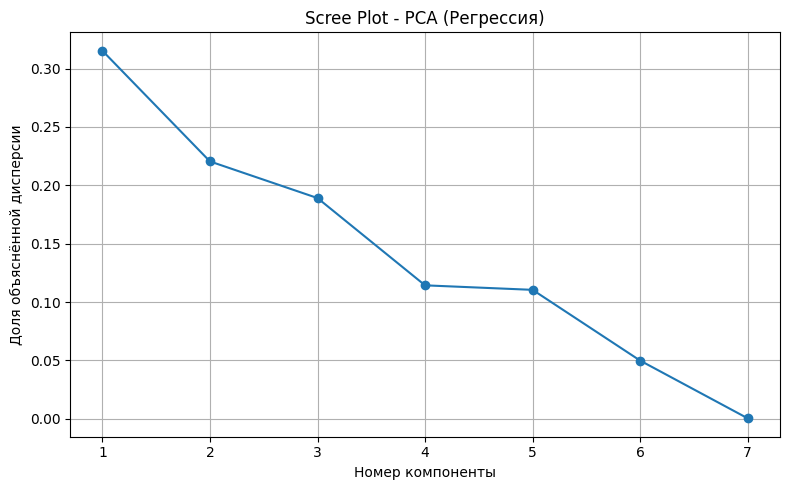

In [12]:
pca_model_cls = best_model_pca_cls.named_steps['feature_selection']
plot_scree_pca(pca_model_cls, title="Scree Plot - PCA (Классификация)")

pca_model_reg = best_model_pca_reg.named_steps['feature_selection']
plot_scree_pca(pca_model_reg, title="Scree Plot - PCA (Регрессия)")

In [13]:
kernel_pca_reg = KernelPCA()
best_model_kernel_pca_reg, best_params_kernel_pca_reg, feature_imp_kernel_pca_reg, kernel_pca_score_reg = optimize_for_regression(kernel_pca_reg, param_grid_kernel_pca_reg, 'KernelPCA', reg_X[:10000], reg_y[:10000])
visualize_results(feature_imp_kernel_pca_reg, 'KernelPCA')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры для KernelPCA: {'feature_selection__gamma': 0.01, 'feature_selection__kernel': 'linear', 'feature_selection__n_components': 6}
Лучший MSE: -102317.6145


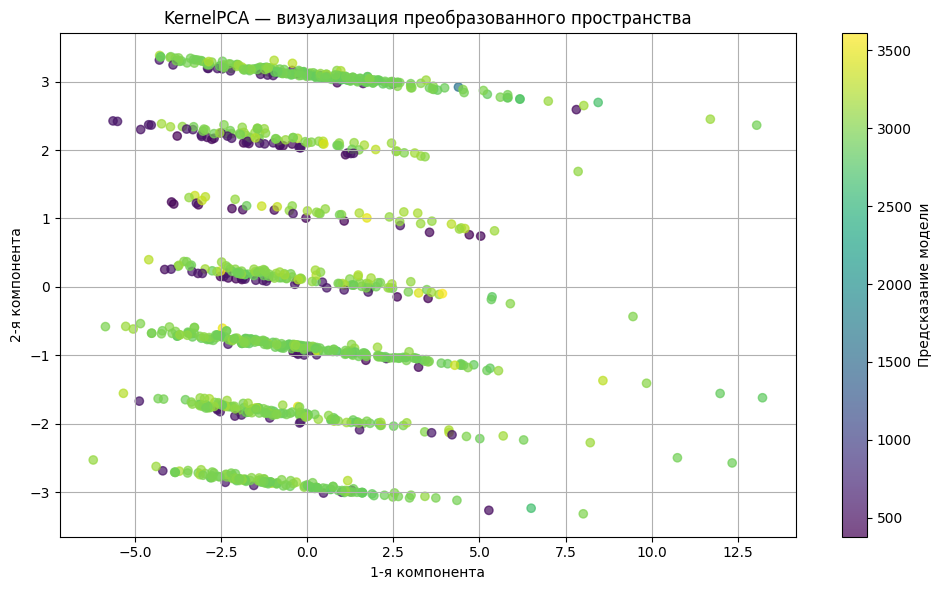

In [14]:
kernel_pca = best_model_kernel_pca_reg.named_steps['feature_selection']
model = best_model_kernel_pca_reg

visualize_kernel_pca_transformed_space(kernel_pca, model, reg_X[:1000])

In [15]:
best_model_tsne_cls = TSNE(n_components=2)
best_params_tsne_cls, feature_imp_tsne_cls = best_model_tsne_cls.get_params(), None
tsne_X = best_model_tsne_cls.fit_transform(class_X)
tsne_X_train, tsne_X_test, y_train, y_test = train_test_split(tsne_X, class_y, test_size=0.2, random_state=42)
nb.fit(tsne_X_train, y_train)
tsne_score_cls = accuracy_score(y_test, nb.predict(tsne_X_test))
print(f"TSNE Classifier Accuracy: {tsne_score_cls:.4f}")
best_model_tsne_reg = TSNE(n_components=2)
best_params_tsne_reg, feature_imp_tsne_reg = best_model_tsne_reg.get_params(), None
tsne_X = best_model_tsne_reg.fit_transform(reg_X)
tsne_X_train, tsne_X_test, y_train, y_test = train_test_split(tsne_X, reg_y, test_size=0.2, random_state=42)
bg.fit(tsne_X_train, y_train)
tsne_score_reg = mean_squared_error(y_test, bg.predict(tsne_X_test))
print(f"TSNE Regressor Mean Squared Error: {tsne_score_reg:.4f}")

TSNE Classifier Accuracy: 0.8858
TSNE Regressor Mean Squared Error: 1212591.3534


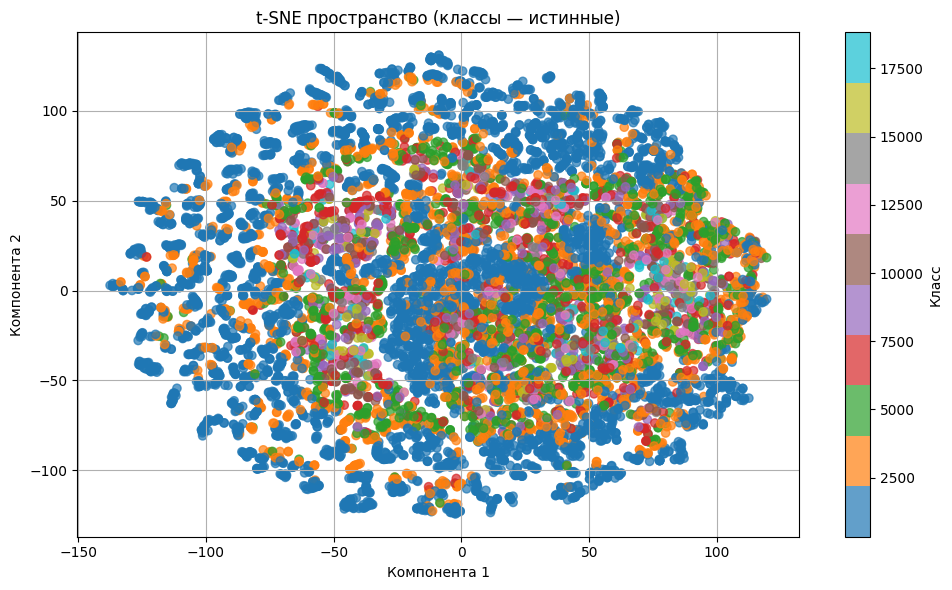

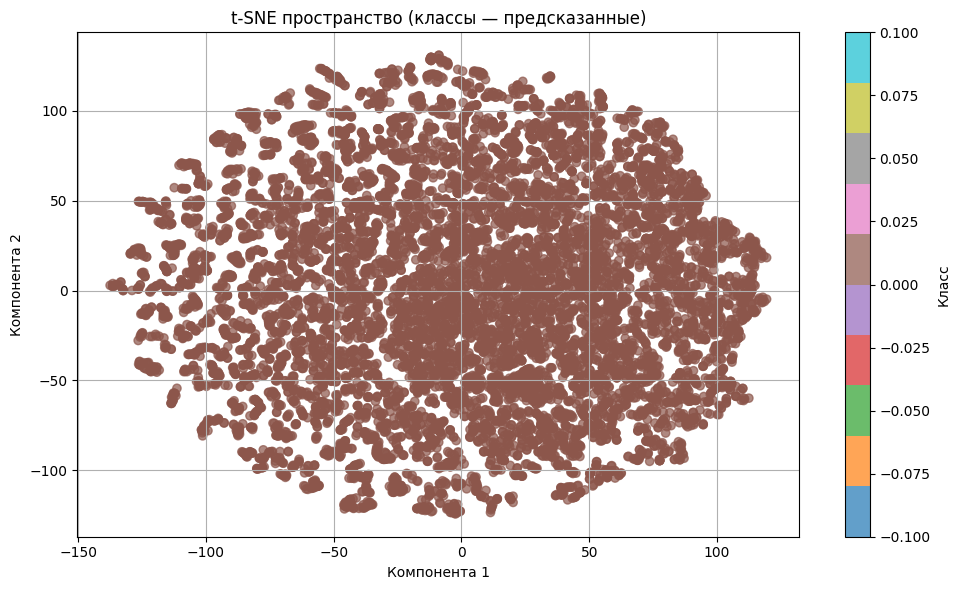

In [16]:
visualize_tsne_classification(tsne_X_test, y_test)

visualize_tsne_classification(tsne_X_test, y_test, y_pred=nb.predict(tsne_X_test))

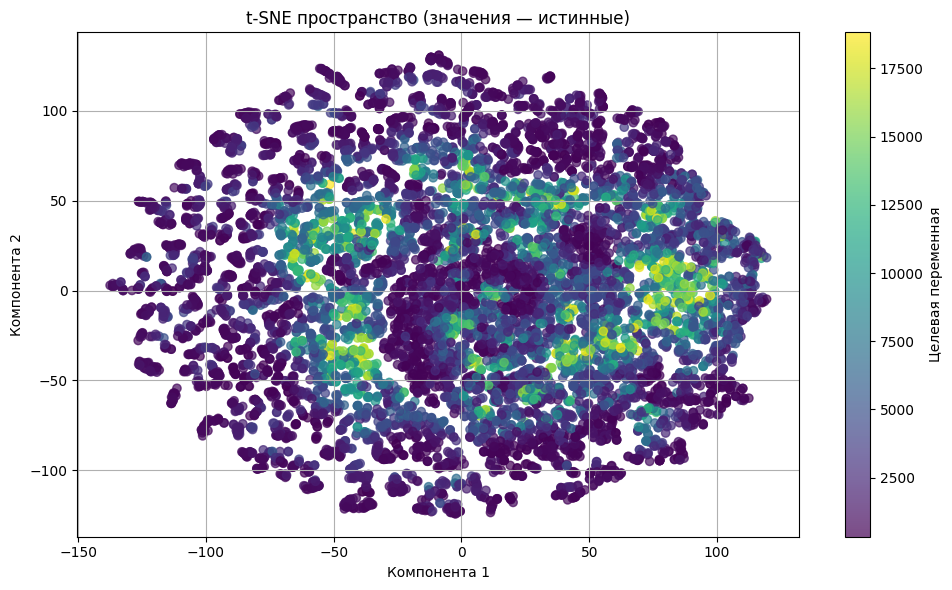

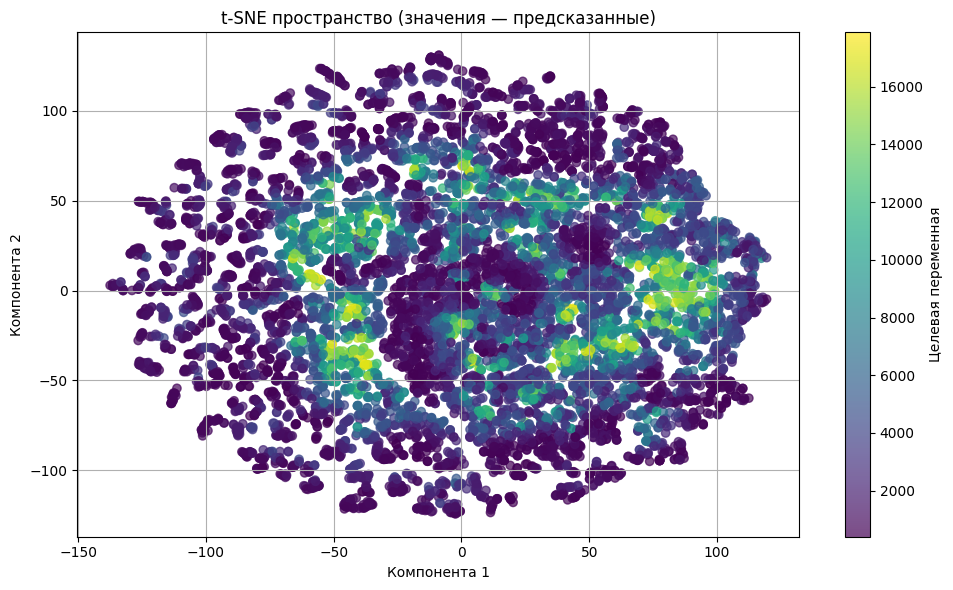

In [17]:
visualize_tsne_regression(tsne_X_test, y_test)

visualize_tsne_regression(tsne_X_test, y_test, y_pred=bg.predict(tsne_X_test))

In [18]:
isomap_cls = Isomap()
best_model_isomap_cls, best_params_isomap_cls, feature_imp_isomap_cls, isomap_score_cls = optimize_for_classification(isomap_cls, param_grid_isomap_cls, 'Isomap', class_X[:10000], class_y[:10000])
visualize_results(feature_imp_isomap_cls, 'Isomap', is_classification=True)
isomap_reg = Isomap()
best_model_isomap_reg, best_params_isomap_reg, feature_imp_isomap_reg, isomap_score_reg = optimize_for_regression(isomap_reg, param_grid_isomap_reg, 'Isomap', reg_X[:10000], reg_y[:10000])
visualize_results(feature_imp_isomap_reg, 'Isomap', is_classification=False)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Лучшие параметры для Isomap: {'feature_selection__metric': 'euclidean', 'feature_selection__n_components': 2, 'feature_selection__n_neighbors': 3}
Лучший score: 0.8776
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Лучшие параметры для Isomap: {'feature_selection__metric': 'manhattan', 'feature_selection__n_components': 9, 'feature_selection__n_neighbors': 10}
Лучший MSE: -175066.8480


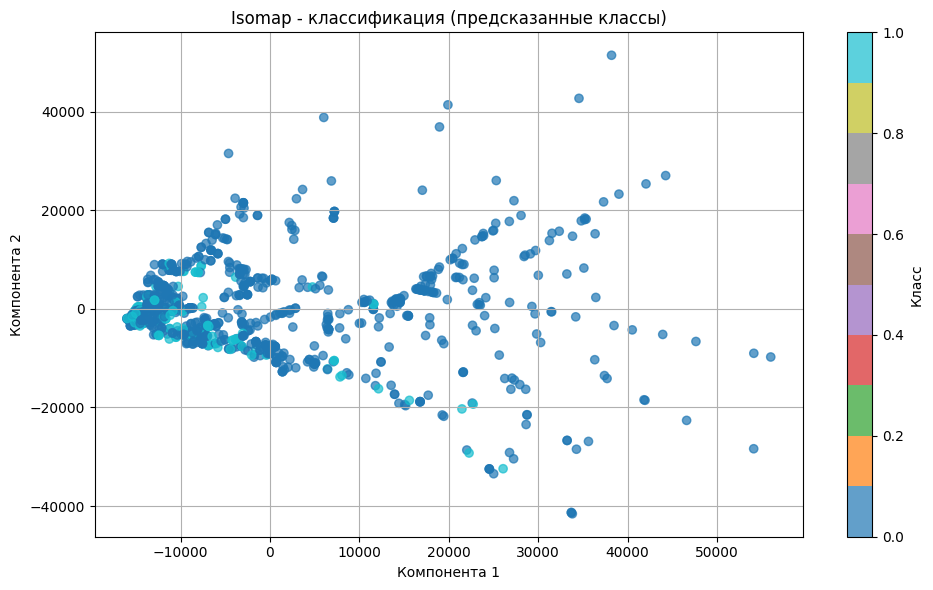

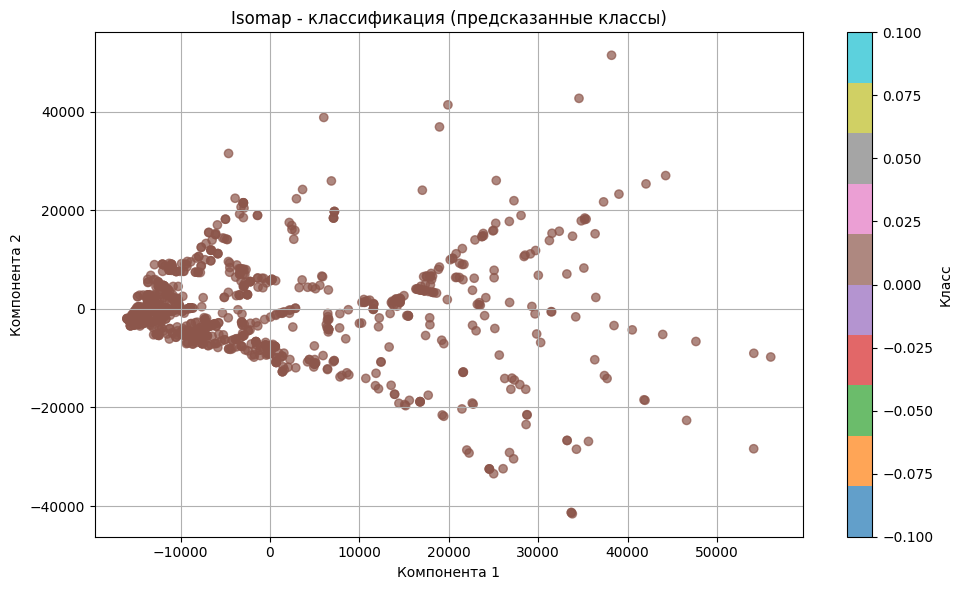

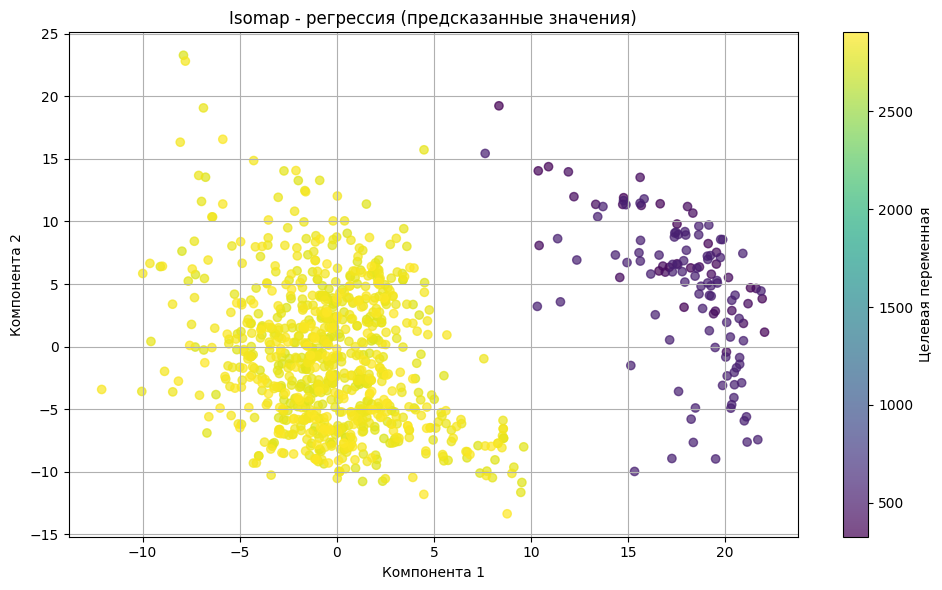

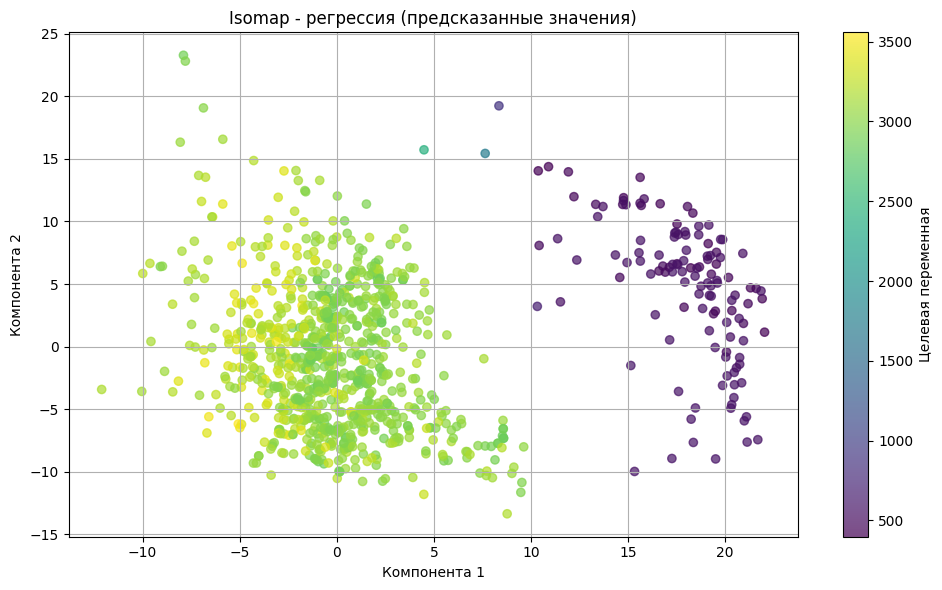

In [19]:
isomap_model = best_model_isomap_cls.named_steps['feature_selection']
X_proj = isomap_model.transform(class_X[:1000])
y_pred = best_model_isomap_cls.predict(class_X[:1000])
visualize_2d_projection(X_proj, class_y[:1000], "Isomap - классификация (предсказанные классы)", is_classification=True)
visualize_2d_projection(X_proj, class_y[:1000], "Isomap - классификация (предсказанные классы)", is_classification=True, y_pred=y_pred)

isomap_model = best_model_isomap_reg.named_steps['feature_selection']
X_proj = isomap_model.transform(reg_X[:1000])
y_pred = best_model_isomap_reg.predict(reg_X[:1000])
visualize_2d_projection(X_proj, reg_y[:1000], "Isomap - регрессия (предсказанные значения)", is_classification=False)
visualize_2d_projection(X_proj, reg_y[:1000], "Isomap - регрессия (предсказанные значения)", is_classification=False, y_pred=y_pred)

In [20]:
umap_cls = umap.UMAP()
best_model_umap_cls, best_params_umap_cls, feature_imp_umap_cls, umap_score_cls = optimize_for_classification(umap_cls, param_grid_umap_cls, 'UMAP', class_X, class_y)
visualize_results(feature_imp_umap_cls, 'UMAP', is_classification=True)
umap_reg = umap.UMAP()
best_model_umap_reg, best_params_umap_reg, feature_imp_umap_reg, umap_score_reg = optimize_for_regression(umap_reg, param_grid_umap_reg, 'UMAP', reg_X, reg_y)
visualize_results(feature_imp_umap_reg, 'UMAP', is_classification=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры для UMAP: {'feature_selection__min_dist': 0.0, 'feature_selection__n_components': 5, 'feature_selection__n_neighbors': 30}
Лучший score: 0.8977
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры для UMAP: {'feature_selection__min_dist': 0.5, 'feature_selection__n_components': 5, 'feature_selection__n_neighbors': 30}
Лучший MSE: -1318711.9530


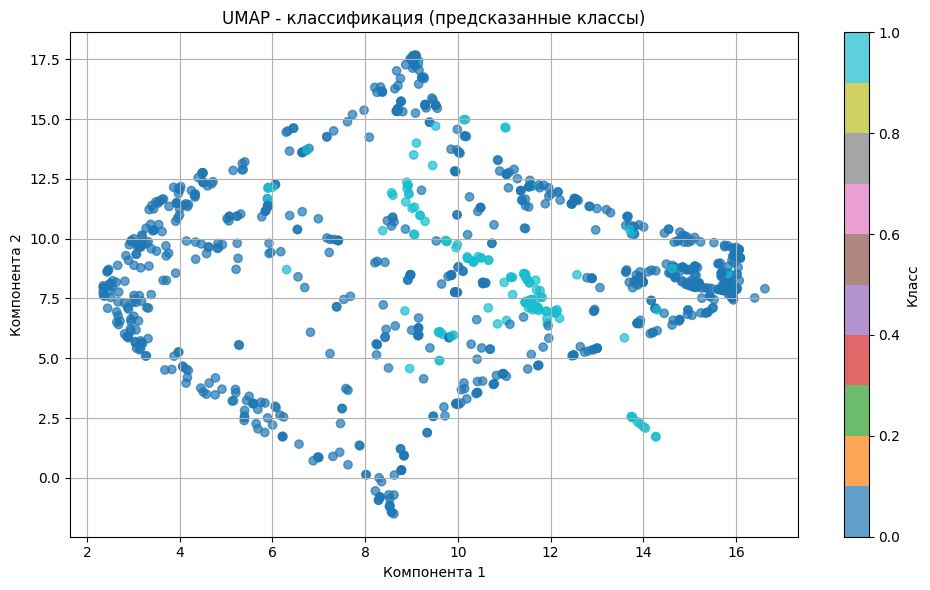

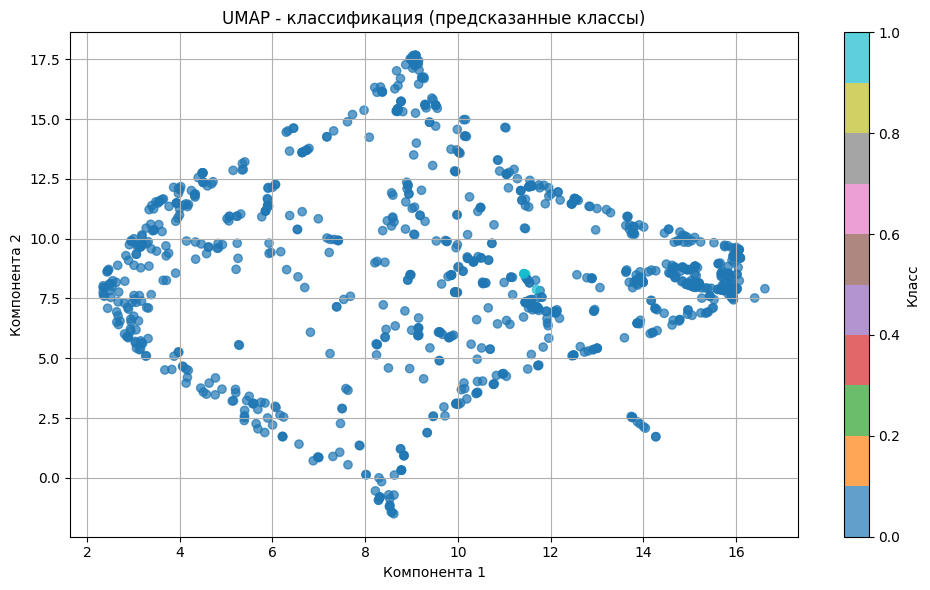

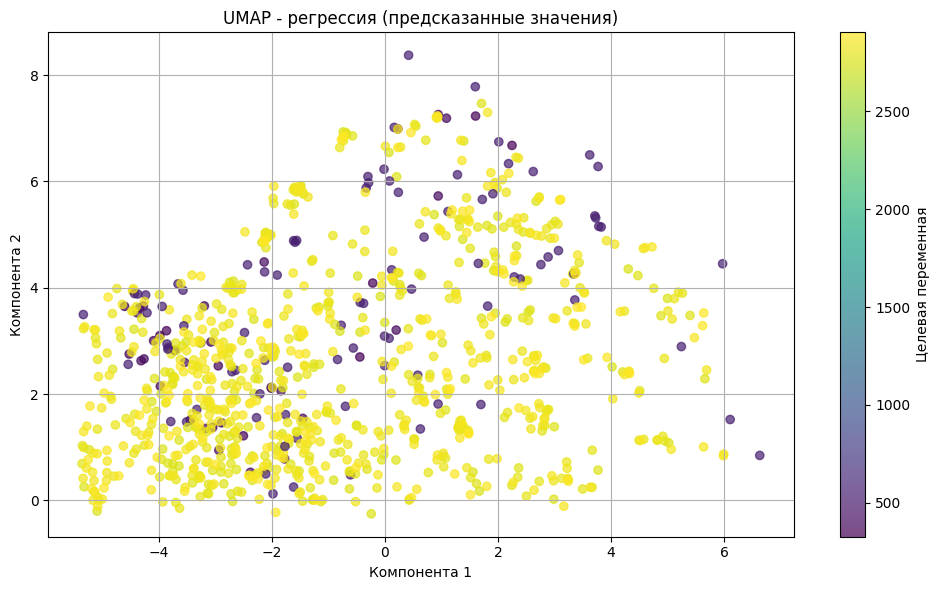

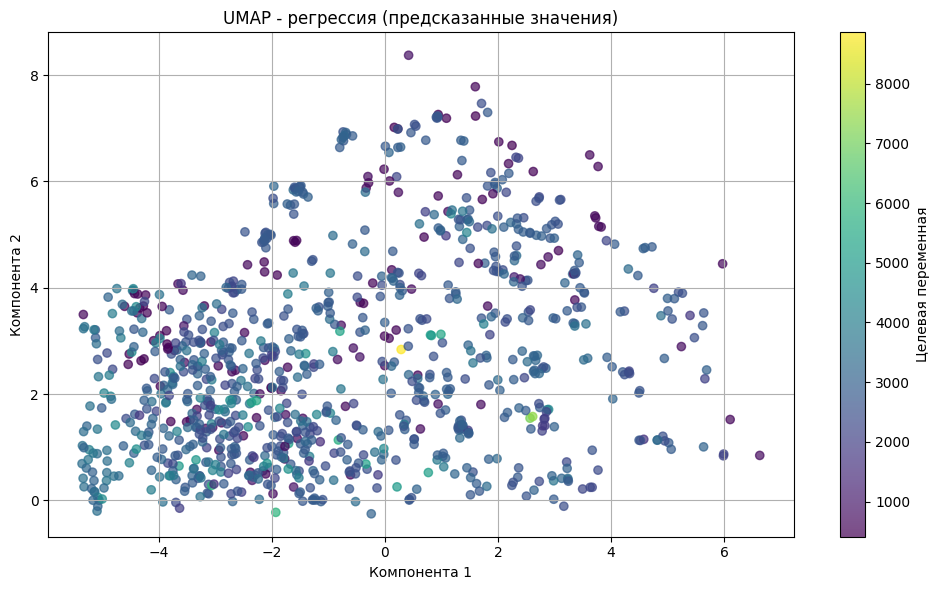

In [21]:
umap_model = best_model_umap_cls.named_steps['feature_selection']
X_proj = umap_model.transform(class_X[:1000])
y_pred = best_model_umap_cls.predict(class_X[:1000])
visualize_2d_projection(X_proj, class_y[:1000], "UMAP - классификация (предсказанные классы)", is_classification=True)
visualize_2d_projection(X_proj, class_y[:1000], "UMAP - классификация (предсказанные классы)", is_classification=True, y_pred=y_pred)

umap_model = best_model_umap_reg.named_steps['feature_selection']
X_proj = umap_model.transform(reg_X[:1000])
y_pred = best_model_umap_reg.predict(reg_X[:1000])
visualize_2d_projection(X_proj, reg_y[:1000], "UMAP - регрессия (предсказанные значения)", is_classification=False)
visualize_2d_projection(X_proj, reg_y[:1000], "UMAP - регрессия (предсказанные значения)", is_classification=False, y_pred=y_pred)

In [22]:
class_X_train, class_X_test, class_y_train, class_y_test = train_test_split(class_X, class_y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(class_X_train, class_y_train)
nb_score = accuracy_score(class_y_test, nb.predict(class_X_test))
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X, reg_y, test_size=0.2, random_state=42)
bg = BaggingRegressor(max_features=1.0, max_samples=0.75, n_estimators=100)
bg.fit(reg_X_train, reg_y_train)
bg_score = mean_squared_error(reg_y_test, bg.predict(reg_X_test))

In [23]:
classification_methods = ['VarianceThreshold', 'SelectKBest', 'RFE', 'PCA', 'KernelPCA', 'TSNE', 'Isomap', 'UMAP', "Standart"]
regression_methods = ['VarianceThreshold', 'SelectKBest', 'RFE', 'PCA', 'KernelPCA', 'TSNE', 'Isomap', 'UMAP', "Standart"]

classification_scores = [
    variance_score_cls,
    select_k_best_score_cls,
    rfe_score_cls,
    pca_score_cls,
    None,
    tsne_score_cls,
    isomap_score_cls,
    umap_score_cls,
    nb_score
]
regression_scores = [
    variance_score_reg,
    select_k_best_score_reg,
    rfe_score_reg,
    pca_score_reg,
    kernel_pca_score_reg,
    tsne_score_reg,
    isomap_score_reg,
    umap_score_reg,
    bg_score
]

In [24]:
results = pd.DataFrame({
    'Method': classification_methods,
    'Classification_Accuracy': classification_scores,
    'Regression_MSE': regression_scores,
})

In [25]:
results

Method  Classification_Accuracy  Regression_MSE
0  VarianceThreshold                 0.899267   -3.100214e+05
1        SelectKBest                 0.927750   -3.098372e+05
2                RFE                 0.925183   -3.106676e+05
3                PCA                 0.905350   -6.987042e+05
4          KernelPCA                      NaN   -1.023176e+05
5               TSNE                 0.885833    1.212591e+06
6             Isomap                 0.877600   -1.750668e+05
7               UMAP                 0.897700   -1.318712e+06
8           Standart                 0.898667    3.144522e+05

Согласно таблице с результатами, лучшей моделью выбора признаков для классификации стала SelectKBest при метрике accuracy равной 0.9278. Лучшей моделью выбора признаков для регрессии стала KernelPCA с линейным ядром при метрике MSE равной 102317.

In [26]:
pca = MyPCA()
pca.fit(class_X)
X_reduced = pca.transform(class_X)

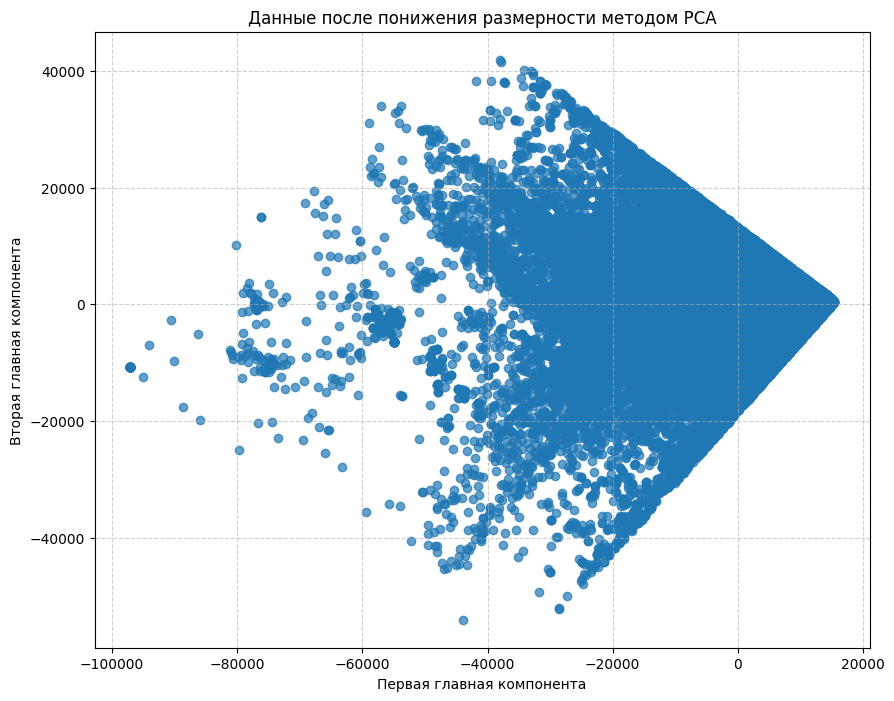

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.7)
plt.title('Данные после понижения размерности методом PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True, linestyle='--', alpha=0.6)

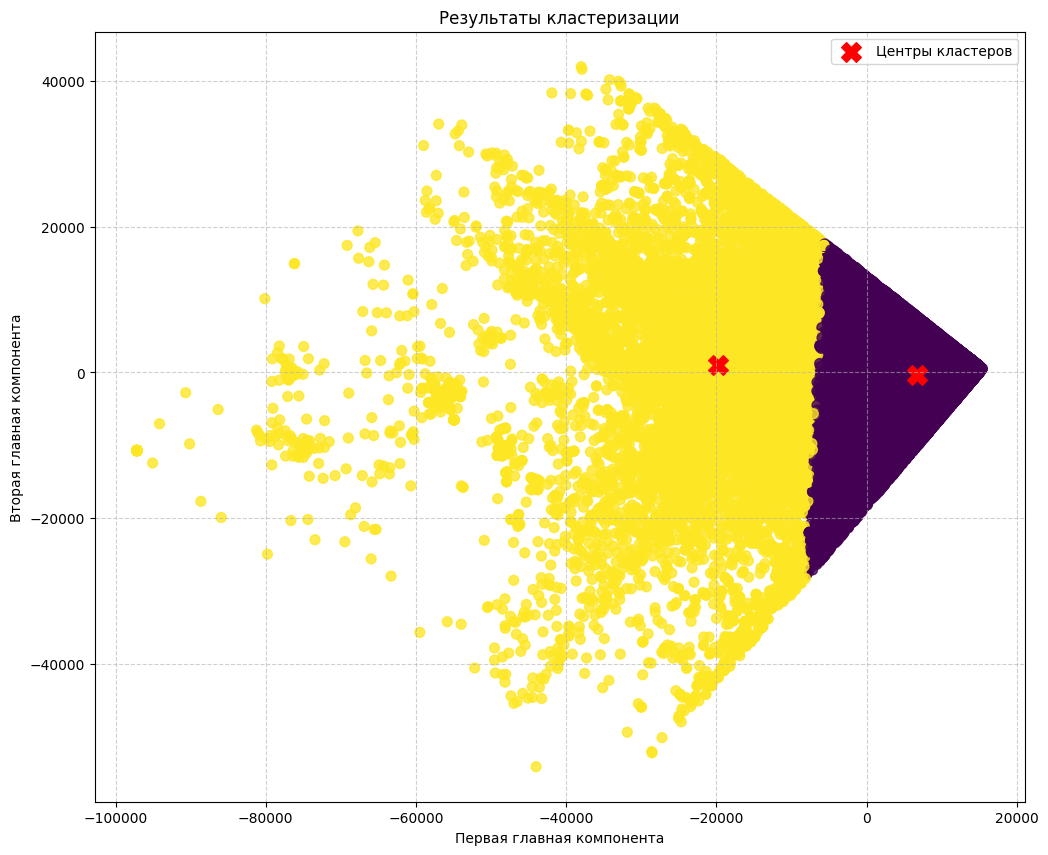

In [28]:
kmeans = MyKMeans()
cluster_labels = kmeans.fit_predict(X_reduced)

plt.figure(figsize=(12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Центры кластеров')
plt.title(f'Результаты кластеризации')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

In [29]:
metrics(kmeans, X_reduced, cluster_labels)

Silhouette: 0.52
Davies-Bouldin: 0.92
Adjusted Rand Index: 1.00
Normalized Mutual Information: 1.00


['0.52', '0.92', '1.00', '1.00']

Алгоритм выделил два кластера: один - для более рассеянных точек и один - для более скучкованных. При этом значения метрик довольно хорошие.